## ¿Qué géneros de videojuegos han sido más populares cada año?

Para responder a esta pregunta haremos lo siguiente:

- Primero vamos a extraer los datos de la API desde los años 2015 hasta el 2024, que son los años que vamos a trabajar.
- Luego limpiaremos los datos extraidos para utilizar los que nos sean necesarios para responder a esta pregunta adecuadamente.
- Por último mostraremos los datos en diferentes gráficas.

### Extracción de datos:

- Importamos las librerias que vamos a necesitar para el proyecto.
- Almacenamos la API key en una variable para utilizarla en la función de extracción de datos.
- Creamos la función para obtener los datos utilizando nuesta API key.

In [2]:
#Importación de las librerias necesarias para el proyecto.

import requests
import pandas as pd
from tqdm import tqdm
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

#Almacenado de la API key en una variable.

API_KEY = "9e9ab06256174d82a01dc73f02418ca2"

#Función de extracción de los datos utilizando la API key almacenada anteriormente.

def obtener_juegos_por_anio(inicio=2024, fin=2024):
    juegos_lista = []
    for year in tqdm(range(inicio, fin + 1)):
        for page in range(1, 6):
            url = f"https://api.rawg.io/api/games?key={API_KEY}&dates={year}-01-01,{year}-12-31&page_size=40&page={page}"
            r = requests.get(url)
            if r.status_code == 200: #Si nos arroja un código 200, almacenamos el dato, ya que es el código que confirma que la operación ha tenido éxito.
                juegos = r.json()['results']
                juegos_lista.extend(juegos)
                time.sleep(1)
            else: #Si no nos arroja un código 200, es que ha habido un error, lo trabajamos para poder seguir con la extracción.
                print(f"Error en el año {year}, página {page}")
    return pd.json_normalize(juegos_lista)

In [3]:
#Almacenamos los datos extraidos en una variable 'df', este será nuestro dataframe.
df = obtener_juegos_por_anio(2015, 2024)

100%|██████████| 10/10 [01:25<00:00,  8.52s/it]


- Por último almacenamos los datos en una variable que vamos a llamar "df" y hacemos un "df.info()" para dar una primera visualización a los datos y trabajar con ellos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   slug                     2000 non-null   object 
 1   name                     2000 non-null   object 
 2   playtime                 2000 non-null   int64  
 3   platforms                2000 non-null   object 
 4   stores                   1989 non-null   object 
 5   released                 2000 non-null   object 
 6   tba                      2000 non-null   bool   
 7   background_image         1999 non-null   object 
 8   rating                   2000 non-null   float64
 9   rating_top               2000 non-null   int64  
 10  ratings                  2000 non-null   object 
 11  ratings_count            2000 non-null   int64  
 12  reviews_text_count       2000 non-null   int64  
 13  added                    2000 non-null   int64  
 14  metacritic              

- Adicionalmente podemos hacer un "df.head()" o un "df.tail()" para dar un vistazo más profundo a los datos.

In [10]:
df.head()

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,added_by_status.toplay,added_by_status.dropped,added_by_status.playing,esrb_rating.id,esrb_rating.name,esrb_rating.slug,esrb_rating.name_en,esrb_rating.name_ru,esrb_rating,community_rating
0,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,43,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-05-18,False,https://media.rawg.io/media/games/618/618c2031...,4.65,5,...,832.0,991.0,892.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN
1,life-is-strange-episode-1-2,Life is Strange,6,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-01-29,False,https://media.rawg.io/media/games/562/56255381...,4.12,5,...,367.0,659.0,152.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN
2,fallout-4,Fallout 4,38,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-11-09,False,https://media.rawg.io/media/games/d82/d82990b9...,3.81,4,...,439.0,1360.0,323.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN
3,rocket-league,Rocket League,21,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-07-07,False,https://media.rawg.io/media/games/8cc/8cce7c0e...,3.93,4,...,114.0,1676.0,542.0,1.0,Everyone,everyone,Everyone,Для всех,NaN,NaN
4,rise-of-the-tomb-raider,Rise of the Tomb Raider,14,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-11-10,False,https://media.rawg.io/media/games/b45/b45575f3...,4.04,4,...,400.0,431.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Si queremos almacenar los datos extraidos en un archivo .csv utilizaremos la siguiente línea de código.
# df.to_csv("juegos_2015_2024.csv", index=False)

## Limpieza y transformación de datos

A continuación queremos limpiar los datos para trabajar con ellos según nuestras necesidades. Como en este caso lo que queremos es saber que generos de videojuegos han sido mas populares, segun el año, y además, hemos podido comprobar que la columna 'genres', que es la que vamos a trabajar principalmente, no tiene nulos. Haremos lo siguiente:

- Nos vamos a quedar con las columnas 'name', 'released' y 'genres'

In [14]:
#Sobrescribimos/transformamos el dataframe de manera que nos muestre las columnas 'name', 'released' y 'genres'. 
df = df[['name', 'released', 'genres', 'added', 'playtime']].dropna()
df

,name,released,genres,added,playtime
0,The Witcher 3: Wild Hunt,2015-05-18,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",21660,43
1,Life is Strange,2015-01-29,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",15758,6
2,Fallout 4,2015-11-09,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",14080,38
3,Rocket League,2015-07-07,"[{'id': 1, 'name': 'Racing', 'slug': 'racing'}...",12768,21
4,Rise of the Tomb Raider,2015-11-10,"[{'id': 4, 'name': 'Action', 'slug': 'action'}]",12211,14
...,...,...,...,...,...
1995,Dark Hours: Prologue,2024-07-18,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",67,2
1996,Age of Water: The First Voyage,2024-03-21,"[{'id': 59, 'name': 'Massively Multiplayer', '...",66,1
1997,SOUTH PARK: SNOW DAY!,2024-03-25,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",65,4
1998,Legacy of Kain™ Soul Reaver 1&2 Remastered,2024-12-10,"[{'id': 83, 'name': 'Platformer', 'slug': 'pla...",65,0


- Vamos a añadir la columna 'año' al dataframe, ya que lo necesitaremos más adelante a la hora de filtrar.

In [16]:
#Creamos la columna 'año', que obtendrá el valor del año de la columna 'released' que tiene formato datetime.
df['año'] = pd.to_datetime(df['released'], errors='coerce').dt.year
df = df.dropna(subset=['año'])
df['año'] = df['año'].astype(int)

In [18]:
df

,name,released,genres,added,playtime,año
0,The Witcher 3: Wild Hunt,2015-05-18,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",21660,43,2015
1,Life is Strange,2015-01-29,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",15758,6,2015
2,Fallout 4,2015-11-09,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",14080,38,2015
3,Rocket League,2015-07-07,"[{'id': 1, 'name': 'Racing', 'slug': 'racing'}...",12768,21,2015
4,Rise of the Tomb Raider,2015-11-10,"[{'id': 4, 'name': 'Action', 'slug': 'action'}]",12211,14,2015
...,...,...,...,...,...,...
1995,Dark Hours: Prologue,2024-07-18,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",67,2,2024
1996,Age of Water: The First Voyage,2024-03-21,"[{'id': 59, 'name': 'Massively Multiplayer', '...",66,1,2024
1997,SOUTH PARK: SNOW DAY!,2024-03-25,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",65,4,2024
1998,Legacy of Kain™ Soul Reaver 1&2 Remastered,2024-12-10,"[{'id': 83, 'name': 'Platformer', 'slug': 'pla...",65,0,2024


- A continuación hemos extraido el género principal de cada juego en una nueva columna llamada 'genero', lo haremos de esta forma porque muchos juegos tienen varios generos, nosotros necesitamos utilizar el género principal por cada juego, sin eliminar la columna 'genres' ya que la necesitaremos para extraer datos mas adelante.

In [21]:
#Creamos la columna 'genero' que extrae el genero que vamos a usar como principal para cada juego mediante un 'df.explode'.
df['generos'] = df['genres'].apply(lambda x: [g['name'] for g in x])
df_exploded = df.explode('generos')
df_exploded = df_exploded.rename(columns={'generos': 'genero'})
#El dataframe se renombra a 'df_exploded' para trabajar con el manteniendo el dataframe original para evitar fugas de datos.
df_exploded

,name,released,genres,added,playtime,año,genero
0,The Witcher 3: Wild Hunt,2015-05-18,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",21660,43,2015,Action
0,The Witcher 3: Wild Hunt,2015-05-18,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",21660,43,2015,RPG
1,Life is Strange,2015-01-29,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",15758,6,2015,Adventure
2,Fallout 4,2015-11-09,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",14080,38,2015,Action
2,Fallout 4,2015-11-09,"[{'id': 4, 'name': 'Action', 'slug': 'action'}...",14080,38,2015,RPG
...,...,...,...,...,...,...,...
1998,Legacy of Kain™ Soul Reaver 1&2 Remastered,2024-12-10,"[{'id': 83, 'name': 'Platformer', 'slug': 'pla...",65,0,2024,Adventure
1998,Legacy of Kain™ Soul Reaver 1&2 Remastered,2024-12-10,"[{'id': 83, 'name': 'Platformer', 'slug': 'pla...",65,0,2024,Action
1998,Legacy of Kain™ Soul Reaver 1&2 Remastered,2024-12-10,"[{'id': 83, 'name': 'Platformer', 'slug': 'pla...",65,0,2024,Puzzle
1999,Outcast 2 — A New Beginning,2024-03-15,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",63,0,2024,Adventure


- Vamos a almacenar los 10 años en 2 rangos de 5 años cada uno, para trabajar con ellos.

In [28]:
df_exploded['rango'] = pd.cut(
    df_exploded['año'],
    bins=[2014, 2019, 2024],
    labels=['2015-2019', '2020-2024']
)

- Vamos a hacer un top 10 de popularidad, utilizando las columnas 'added' y 'playtime', cada una será almacenada en variables diferentes para obtener diferentes gráficas más adelante y poder ver los datos desde dos perspectivas diferentes. Serán en rangos de 5 años cada una.

In [51]:
#Agrupamos por rango y género y sumamos los 'added' y los 'playtime' en dos variables diferentes.
popularidad_por_rango = (
    df_exploded.groupby(['rango', 'genero'], observed=False)['added']
    .sum()
    .reset_index(name='popularidad')
)
playtime_por_rango = (
    df_exploded.groupby(['rango', 'genero'], observed=False)['playtime']
    .sum()
    .reset_index(name='tiempo_jugado')
)
#Sacamos los top 10 por rango, en sus respectibas variable, para 'added' y para 'playtime'
top10_added_por_rango = (
    popularidad_por_rango
    .sort_values(['rango', 'popularidad'], ascending=[True, False])
    .groupby('rango', observed=False)
    .head(10)
    .reset_index(drop=True)
)
top10_playtime_por_rango = (
    playtime_por_rango
    .sort_values(['rango', 'tiempo_jugado'], ascending=[True, False])
    .groupby('rango', observed=False)
    .head(10)
    .reset_index(drop=True)
)

- Por último vamos a crear un top 10 para ver los generos más jugados a través de todo el rango de años con los que estamos trabajando para ver los datos de una forma más global. Haremos un top global por la columna 'added' y otro para la columna 'playtime'.

In [61]:
#Utilizamos el conteo anterior para almacenar los 10 generos más populares de todos los años de nuestro dataframe.
#Será el top 10 global, por lo que lo almacenamos en la variable 'top10_global'.
top10_added_global = (
    df_exploded.groupby('genero')['added']
    .sum()
    .reset_index(name='popularidad')
    .sort_values('popularidad', ascending=False)
    .head(10)
)
top10_playtime_global = (
    df_exploded.groupby('genero')['playtime']
    .sum()
    .reset_index(name='tiempo_jugado')
    .sort_values('tiempo_jugado', ascending=False)
    .head(10)
)
print(top10_added_global)
print(top10_playtime_global)

        genero  popularidad
0       Action      2623236
1    Adventure      1686090
9        Indie      1597956
13         RPG      1114346
15     Shooter       637064
18    Strategy       600204
16  Simulation       561609
5       Casual       378114
11  Platformer       235214
12      Puzzle       226503
                   genero  tiempo_jugado
0                  Action           6154
1               Adventure           4670
9                   Indie           3379
13                    RPG           3317
18               Strategy           1603
16             Simulation           1429
15                Shooter           1149
5                  Casual            897
10  Massively Multiplayer            434
12                 Puzzle            422


## Visualización de los datos

A continuación queremos mostrar los datos que hemos extraido y filtrado anteriormente.

- Primero vamos a mostrar el top 5 de cada año.

In [161]:
df.columns

Index(['name', 'released', 'genres', 'added', 'año', 'generos'], dtype='object')

In [163]:
#Vamos a aplicar un estilo de gráfico para utilizar en todos los gráficos.
sns.set_style("whitegrid")
sns.set_palette("deep")

## Años 2015 a 2019

In [149]:
#Filtramos los datos del rango 2015 a 2024
df_2015_2019 = df[(df['año'] >= 2015) & (df['año'] <= 2019)]

### Gráfico de popularidad en base a "added"

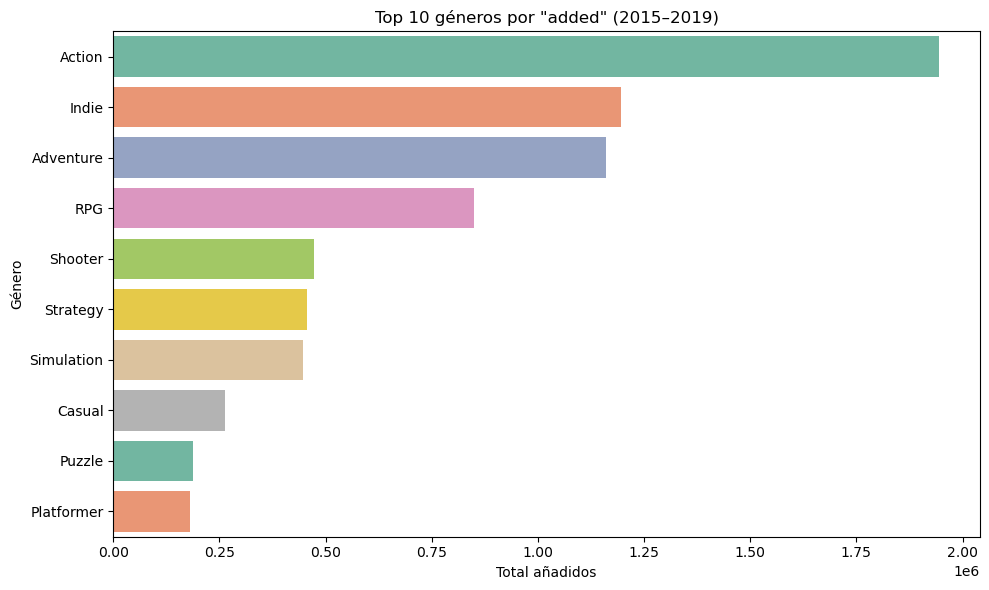

added,playtime
1.00,0.40
0.40,1.00


In [151]:
df_rango1 = top10_added_por_rango[top10_added_por_rango['rango'] == '2015-2019']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_rango1, x='popularidad', y='genero', hue='genero', palette='Set2')
plt.title('Top 10 géneros por "added" (2015–2019)')
plt.xlabel('Total añadidos')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2015_2019[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

### Gráfico de popularidad en base a "playtime"

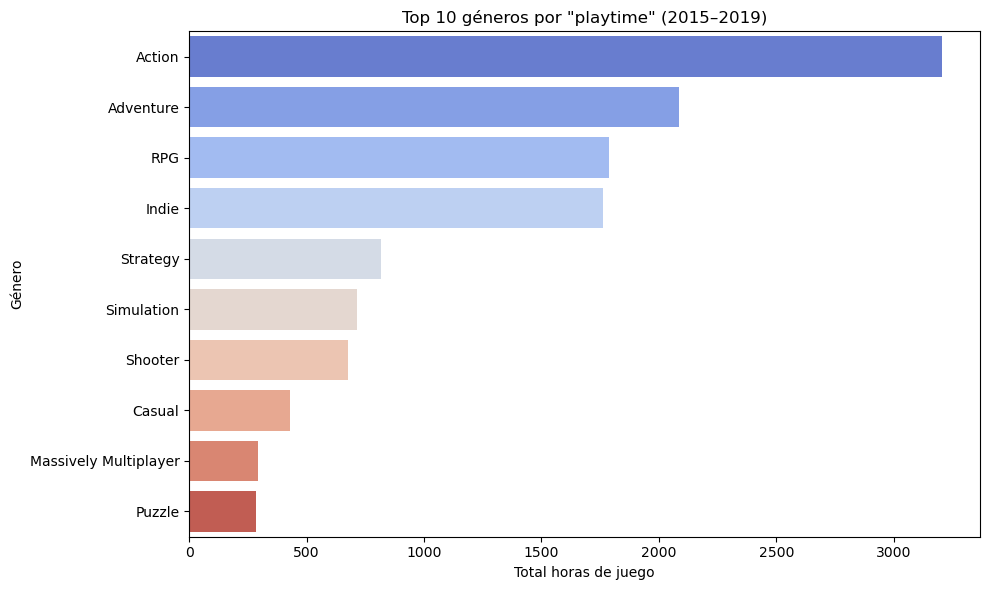

added,playtime
1.00,0.40
0.40,1.00


In [153]:
df_playtime1 = top10_playtime_por_rango[top10_playtime_por_rango['rango'] == '2015-2019']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_playtime1, x='tiempo_jugado', y='genero', hue='genero', palette='coolwarm')
plt.title('Top 10 géneros por "playtime" (2015–2019)')
plt.xlabel('Total horas de juego')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2015_2019[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

## Años 2019 a 2024

In [141]:
#Filtramos los datos del rango 2019 a 2024
df_2019_2024 = df[(df['año'] >= 2019) & (df['año'] <= 2024)]

### Gráfico de popularidad en base a "added"

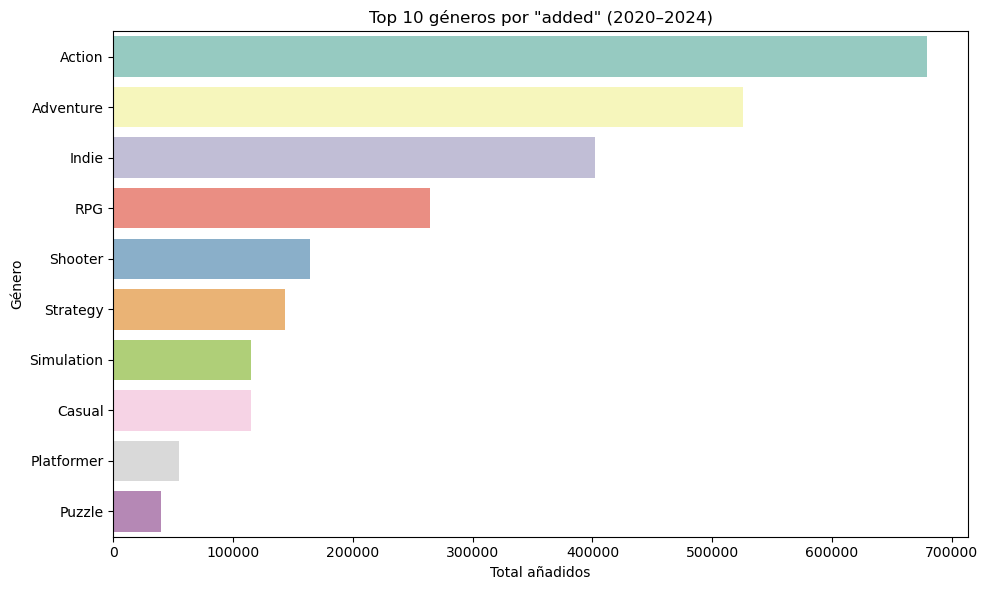

added,playtime
1.00,0.23
0.23,1.00


In [145]:
df_rango2 = top10_added_por_rango[top10_added_por_rango['rango'] == '2020-2024']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_rango2, x='popularidad', y='genero', hue='genero', palette='Set3')
plt.title('Top 10 géneros por "added" (2020–2024)')
plt.xlabel('Total añadidos')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2019_2024[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

### Gráfico de popularidad en base a "playtime"

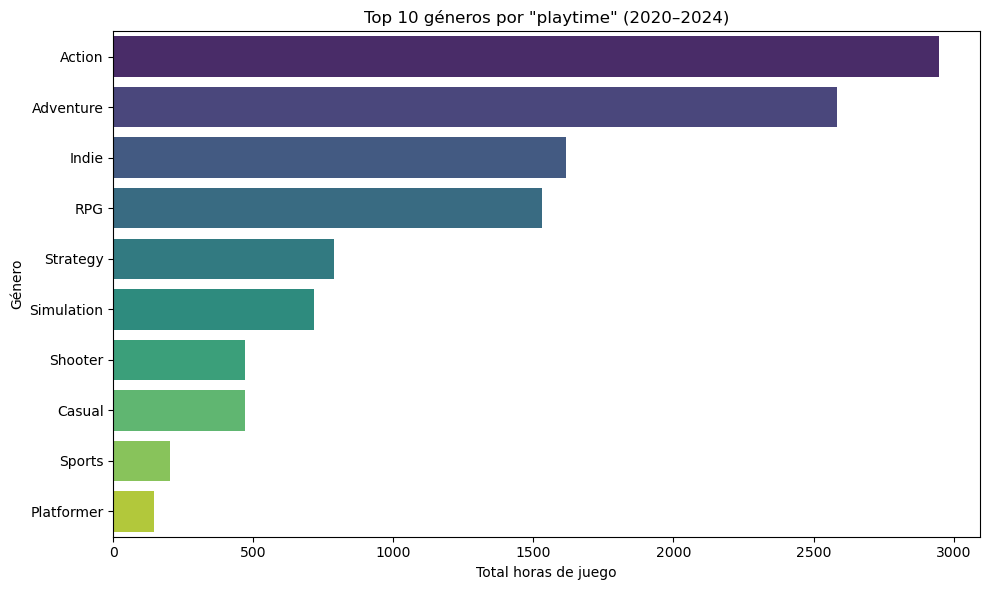

added,playtime
1.00,0.23
0.23,1.00


In [147]:
df_playtime2 = top10_playtime_por_rango[top10_playtime_por_rango['rango'] == '2020-2024']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_playtime2, x='tiempo_jugado', y='genero', hue='genero', palette='viridis')
plt.title('Top 10 géneros por "playtime" (2020–2024)')
plt.xlabel('Total horas de juego')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2019_2024[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

## Top 10 global (Años 2015 a 2024)

### Gráfica de popularidad por "added"

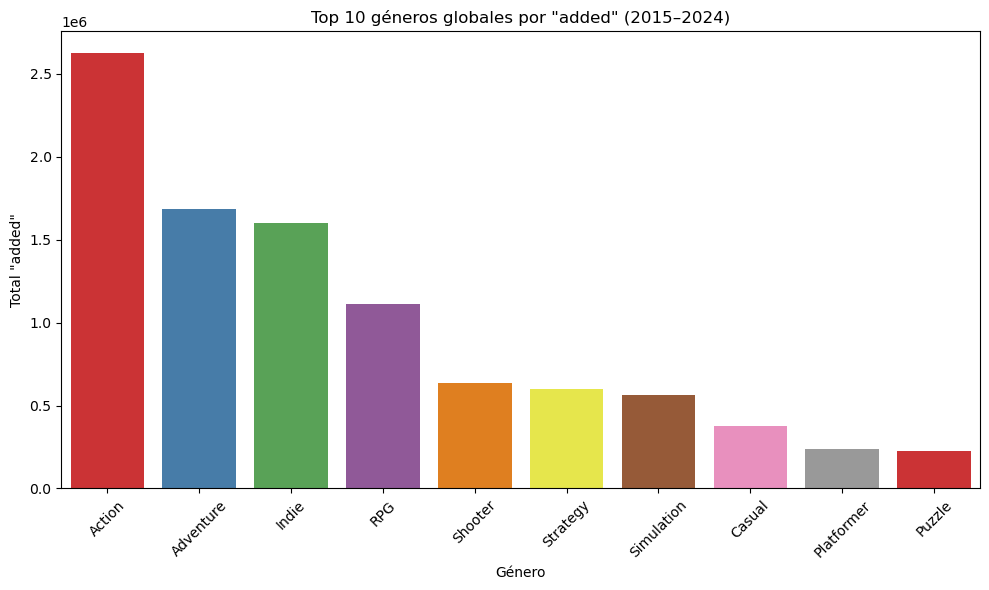

added,playtime
1.00,0.32
0.32,1.00


In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_added_global, x='genero', hue='genero', y='popularidad', palette='Set1')
plt.title('Top 10 géneros globales por "added" (2015–2024)')
plt.xlabel('Género')
plt.ylabel('Total "added"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

correlacion = df[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

### Gráfica de popularidad por "playtime"

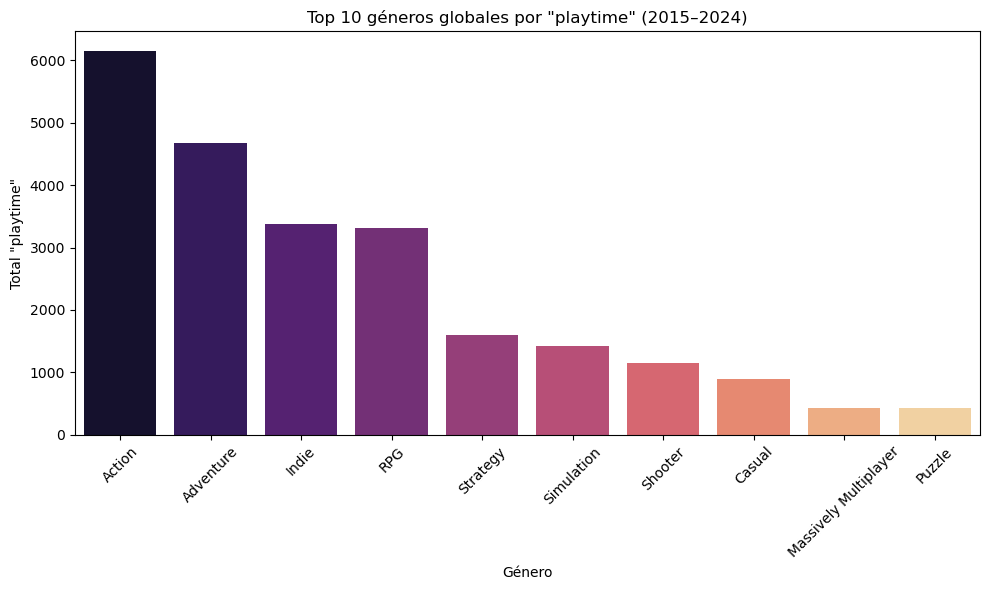

added,playtime
1.00,0.32
0.32,1.00


In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_playtime_global, x='genero', y='tiempo_jugado', hue='genero', palette='magma')
plt.title('Top 10 géneros globales por "playtime" (2015–2024)')
plt.xlabel('Género')
plt.ylabel('Total "playtime"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

correlacion = df[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

## Conclusión Final

Como hemos podido analizar en nuestros datos, la popularidad de los generos parece haberse mantenido de forma similar en los generos mas populares, siendo estos Acción, Aventura e Indie, que no han sufrido grandes cambios, habiendo valorado tanto la cantidad de veces que se han añadido sus juegos a las bibliotecas de los jugadores como la suma de las horas de juego totales. Si que hemos notado algunos cambios con otros generos.

Lo que hemos podido observar:

- Los géneros Acción, Aventura, Indie y RPG se mantienen en una posición dominante, tanto en veces añadidas como en horas jugadas. Como observación adicional, el género RPG reduce considerablemente su distancia con el género Indie, llegando casi a empatarlo en cuanto a horas jugadas (playtime)
  
- Empezando desde atrás, los 3 géneros menos populares se mantienen con una sorprendente excepción. El género Puzzle se mantiene en el top 10 y el Casual en el top 8 en ambos casos, pero, en la gráfica de horas jugadas (playtime), el género de juegos de Plataformas no solo pierde su lugar en el top 9, sino que desaparece de la gráfica y es sustituido por el genero Multijugador Masivo, que a su vez, hace aparición por primera vez en nuestra gráfica.

- Los géneros Shooter, Estrategia y Simulación, son los que mas variación sufren entre ellos, y por ello son los que parecen mas interesantes:

    - El género Shooter estaba en el top 5 en cuanto a juegos añadidos, en tiempo jugado, baja hasta el top 7.
    - El género Estrategia estaba en el top 6 en cuanto a juegos añadidos, en tiempo jugado, sube hasta el top 5.
    - El género Simulación estaba en el top 7 en cuanto a juegos añadidos, en tiempo jugado, sube hasta el top 6.

En resumen, observamos que no siempre es mas popular el juego que mas gente tiene añadida en su biblioteca o comprado, sino que también tiene bastante peso la cantidad de horas que acumulan sus usuarios. La clave esta en encontrar el balance entre ambas estadísticas, ya que ambas son muy importantes.

- Un juego que muchos usuarios adquieren, pero juegan poco tiempo, solo tendrá popularidad a corto plazo.
- Un juego cuyos usuarios juegan mucho tiempo, pero tiene pocos usuarios, solo tendrá popularidad a largo plazo, cuando más usuarios lo adquieran.